### Travel Python Notebook to Analyze Booking Data from Expedia and Airbnb Using Data from Kaggle

To Do List:
1. Load packages and data.
2. View data structure, summary statistics and plots.
3. Clean data, select and transform features.
4. Subset training data and fit models.
5. Check error rate on validation data and tune models.
6. Check model performance on test data.

Big Picture:
1. First perform a basic broad analysis.
2. Then improve by adding and trying new or more advanced data manipulation/feature engineering/modeling techniques from books or other resources.

In [584]:
# Load Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas import DataFrame

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc

#from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
#from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [585]:
# Read Data
age_gender = pd.read_csv('./airbnb-recruiting-new-user-bookings/age_gender_bkts.csv')
countries = pd.read_csv('./airbnb-recruiting-new-user-bookings/countries.csv')
#sessions = pd.read_csv('./airbnb-recruiting-new-user-bookings/sessions.csv')
train_users = pd.read_csv('./airbnb-recruiting-new-user-bookings/train_users_2.csv')
test_users = pd.read_csv('./airbnb-recruiting-new-user-bookings/test_users.csv')

In [586]:
# Check User Summary Statistics Data Size and Structure
print(age_gender.shape)

# Check Year
print(age_gender['year'].unique())

# Check Duplicates
print(any(age_gender.duplicated()))
age_gender.head(10)

(420, 5)
[2015.]
False


,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
5,75-79,AU,male,298.0,2015.0
6,70-74,AU,male,415.0,2015.0
7,65-69,AU,male,574.0,2015.0
8,60-64,AU,male,636.0,2015.0
9,55-59,AU,male,714.0,2015.0


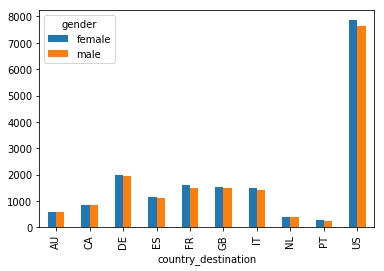

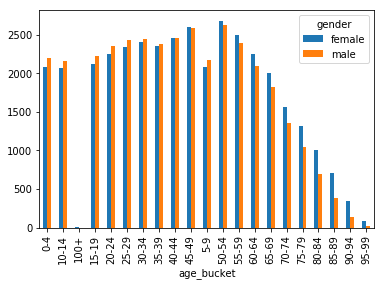

In [587]:
# Slicing by Gender
age_male = age_gender[age_gender.gender=='male']
age_female = age_gender[age_gender.gender=='female']

# Plot Data
#p1 = plt.bar(age_male['country_destination'], age_male['population_in_thousands'], facecolor='green')
#p2 = plt.bar(age_female['country_destination'], age_female['population_in_thousands'], facecolor='purple')
#plt.xlabel('Destination')
#plt.ylabel('Population')
#plt.title('Population in Each Destination by Gender')
#plt.legend((p1[0], p2[0]), ('Men', 'Women'))
#plt.show()

age_gender.groupby(['country_destination', 'gender'])['population_in_thousands'].mean().unstack().plot.bar()
age_gender.groupby(['age_bucket', 'gender'])['population_in_thousands'].mean().unstack().plot.bar()

In [588]:
# Check Country Summary Statistics Data
print(countries.shape)
print(any(countries.duplicated()))
countries

(10, 7)
False


,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


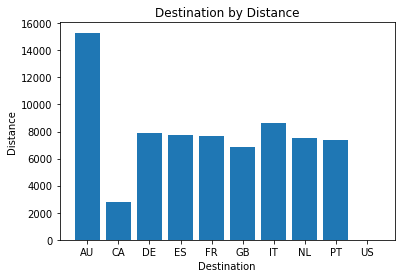

In [589]:
# Plot Destinations by Distance
p1 = plt.bar(countries['country_destination'], countries['distance_km'])
plt.xlabel('Destination')
plt.ylabel('Distance')
plt.title('Destination by Distance')
plt.show()

In [590]:
# Merge Tables Based on Destination (not sure if this is helpful)
pd.merge(age_gender, countries, on="country_destination").head(10)

,age_bucket,country_destination,gender,population_in_thousands,year,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,100+,AU,male,1.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
1,95-99,AU,male,9.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
2,90-94,AU,male,47.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
3,85-89,AU,male,118.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
4,80-84,AU,male,199.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
5,75-79,AU,male,298.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
6,70-74,AU,male,415.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
7,65-69,AU,male,574.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
8,60-64,AU,male,636.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
9,55-59,AU,male,714.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0


In [591]:
# Check Out Training Data
print(train_users.shape)
train_users.info()
train_users.describe()
print(train_users.columns)
print(any(train_users.duplicated()))
#train_users.head(3)

(213451, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB
Index(['id', '

In [592]:
# Number of Unique Languages
len(train_users['language'].unique().tolist())

25

In [593]:
# Check for NA's and Outliers to Drop then Display Age Range
print(train_users['age'].isnull().values.any())
print(train_users['age'].isnull().sum())
train_noNA = train_users.dropna()[train_users.age<100]
print(min(train_noNA['age']), " to ", max(train_noNA['age']))
print(train_noNA.describe())

# Check Out Correlation
train_noNA.corr()

True
87990


C:\Users\yongy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


2.0  to  99.0
       timestamp_first_active           age   signup_flow
count            6.684600e+04  66846.000000  66846.000000
mean             2.013033e+13     36.116477      2.445876
std              9.446380e+09     11.171520      6.542943
min              2.009061e+13      2.000000      0.000000
25%              2.012112e+13     28.000000      0.000000
50%              2.013082e+13     33.000000      0.000000
75%              2.014023e+13     41.000000      0.000000
max              2.014063e+13     99.000000     25.000000


,timestamp_first_active,age,signup_flow
timestamp_first_active,1.000000,-0.077141,0.132124
age,-0.077141,1.000000,-0.077910
signup_flow,0.132124,-0.077910,1.000000


In [594]:
# Unique Categories of Selected Features in Training Data
#print("gender:", train_noNA['gender'].unique())
for k in range(1, train_noNA.shape[1]):
    print(eval('train_noNA.columns.values[k]'), ':', train_noNA[train_noNA.columns.values[k]].unique())

date_account_created : ['2010-09-28' '2011-12-05' '2010-09-14' ... '2014-06-27' '2014-06-29'
 '2014-06-30']
timestamp_first_active : [20090609231247 20091031060129 20091208061105 ... 20140630235151
 20140630235340 20140630235547]
date_first_booking : ['2010-08-02' '2012-09-08' '2010-02-18' ... '2015-06-25' '2015-06-29'
 '2015-06-28']
gender : ['FEMALE' '-unknown-' 'MALE' 'OTHER']
age : [56. 42. 41. 46. 47. 50. 36. 33. 29. 30. 40. 26. 32. 37. 31. 44. 19. 52.
 35. 57. 49. 54. 28. 34. 69. 43. 39. 38. 63. 18. 45. 25. 60. 48. 51. 61.
 64. 70. 67. 55. 65. 73.  5. 66. 68. 27. 53. 75. 59. 79. 62. 72. 58.  4.
 24. 98. 74. 23. 87. 92. 84. 71. 21. 15. 22.  2. 78. 86. 81. 95. 90. 82.
 77. 85. 83. 17. 20. 91. 97. 80. 88. 93. 76. 96. 99. 89. 16.]
signup_method : ['basic' 'facebook' 'google']
signup_flow : [ 3  0  2  1 24  8  6 10  5 12 16 15 21 25 20 23]
language : ['en' 'es' 'fr' 'zh' 'ko' 'de' 'it' 'ja' 'pt' 'ru' 'nl' 'sv' 'pl' 'da'
 'fi' 'tr' 'no' 'hu' 'cs' 'th' 'ca' 'is' 'el']
affiliate_channel 

In [595]:
# Check Out Test Data (No Destination Given)
print(test_users.shape)
print(any(test_users.duplicated()))
#test_users.head(10)

(62096, 15)
False


In [596]:
# Drop Column of All NA's (the column actually does not exist in training dataset)
test_users1 = test_users.drop(["date_first_booking"], axis=1)

print(test_users1['age'].isnull().values.any())
print(test_users1['age'].isnull().sum())
test_noNA = test_users1.dropna()[test_users.age<100]
print(min(test_noNA['age']), " to ", max(test_noNA['age']))
print(test_noNA.describe())

# Check Out Correlation
test_noNA.corr()

True
28876
1.0  to  99.0
       timestamp_first_active           age   signup_flow
count            3.285800e+04  32858.000000  32858.000000
mean             2.014081e+13     34.157131      6.883955
std              8.052420e+07     11.341119     10.972285
min              2.014070e+13      1.000000      0.000000
25%              2.014072e+13     26.000000      0.000000
50%              2.014081e+13     31.000000      0.000000
75%              2.014091e+13     39.000000     23.000000
max              2.014093e+13     99.000000     25.000000


C:\Users\yongy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,timestamp_first_active,age,signup_flow
timestamp_first_active,1.000000,0.008067,-0.016093
age,0.008067,1.000000,-0.114161
signup_flow,-0.016093,-0.114161,1.000000


In [597]:
# Unique Categories of Selected Features in Test Data (test data contains more features than training data)
#print("gender:", test_noNA['gender'].unique())
for k in range(1, test_noNA.shape[1]):
    print(eval('test_noNA.columns.values[k]'), ':', test_noNA[test_noNA.columns.values[k]].unique())

date_account_created : ['2014-07-01' '2014-07-02' '2014-07-03' '2014-07-04' '2014-07-05'
 '2014-07-06' '2014-07-07' '2014-07-08' '2014-07-09' '2014-07-10'
 '2014-07-11' '2014-07-12' '2014-07-13' '2014-07-14' '2014-07-15'
 '2014-07-16' '2014-07-17' '2014-07-18' '2014-07-19' '2014-07-20'
 '2014-07-21' '2014-07-22' '2014-07-23' '2014-07-24' '2014-07-25'
 '2014-07-26' '2014-07-27' '2014-07-28' '2014-07-29' '2014-07-30'
 '2014-07-31' '2014-08-01' '2014-08-02' '2014-08-03' '2014-08-04'
 '2014-08-05' '2014-08-06' '2014-08-07' '2014-08-08' '2014-08-09'
 '2014-08-10' '2014-08-11' '2014-08-12' '2014-08-13' '2014-08-14'
 '2014-08-15' '2014-08-16' '2014-08-17' '2014-08-18' '2014-08-19'
 '2014-08-20' '2014-08-21' '2014-08-22' '2014-08-23' '2014-08-24'
 '2014-08-25' '2014-08-26' '2014-08-27' '2014-08-28' '2014-08-29'
 '2014-08-30' '2014-08-31' '2014-09-01' '2014-09-02' '2014-09-03'
 '2014-09-04' '2014-09-05' '2014-09-06' '2014-09-07' '2014-09-08'
 '2014-09-09' '2014-09-10' '2014-09-11' '2014-09-12' 

In [598]:
# Check if Training and Testing Features Match
#print("gender:", train_noNA['gender'].unique() in test_noNA['gender'].unique())
common = pd.DataFrame(np.zeros(max(test_noNA.shape[1],test_noNA.shape[1]))).astype('object')
#train_noNA[train_noNA.columns.values[4:15]]
#test_noNA[test_noNA.columns.values[3:14]]
for i in range(3, 14):
    for j in range(4, 15):
        if test_noNA.columns.values[i] == train_noNA.columns.values[j]:
            print(eval('test_noNA.columns.values[i]'), ':', set(train_noNA[train_noNA.columns.values[j]].unique()) == set(test_noNA[test_noNA.columns.values[i]].unique()))
            # Store Intersections
            common[0][i] = set(train_noNA[train_noNA.columns.values[j]].unique()) & set(test_noNA[test_noNA.columns.values[i]].unique())
            # Rename Rows
            common = common.rename(index = {eval('i'):test_noNA.columns.values[i]})
common

gender : True
age : False
signup_method : False
signup_flow : False
language : False
affiliate_channel : False
affiliate_provider : False
first_affiliate_tracked : True
signup_app : True
first_device_type : True
first_browser : False


,0
0,0
1,0
2,0
gender,"{-unknown-, FEMALE, OTHER, MALE}"
age,"{15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22...."
signup_method,"{google, facebook, basic}"
signup_flow,"{0, 8, 12, 21, 23, 25}"
language,"{fi, ru, zh, en, fr, pt, no, ko, it, da, cs, t..."
affiliate_channel,"{direct, sem-brand, seo, remarketing, content,..."
affiliate_provider,"{yandex, google, direct, meetup, facebook-open..."


In [599]:
# Only Keep Intersection in Training and Testing Datasets
train_int = train_noNA
for i in range(4, 15):
    for j in range(3, 14):
        if train_noNA.columns.values[i] == common.index.values[j]:
            train_int = train_int[train_noNA[train_noNA.columns.values[i]].isin(common[0][common.index.values[j]])]
print(train_int.shape) # mush smaller now

test_int = test_noNA
for i in range(3, 14):
    for j in range(3, 14):
        if test_noNA.columns.values[i] == common.index.values[j]:
            test_int = test_int[test_noNA[test_noNA.columns.values[i]].isin(common[0][common.index.values[j]])]
print(test_int.shape)

# Check Again
for i in range(1, test_int.shape[1]):
    for j in range(1, train_int.shape[1]):
        if test_int.columns.values[i] == train_int.columns.values[j]:
            print(eval('test_int.columns.values[i]'), ':', set(train_int[train_int.columns.values[j]].unique()) == set(test_int[test_int.columns.values[i]].unique()))
            
#pd.concat([pd.DataFrame(train_int['first_browser'].unique()), pd.DataFrame(test_int['first_browser'].unique())], axis=1, sort=True)

C:\Users\yongy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\yongy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\yongy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\yongy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\yongy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\yongy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\yongy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed 

(57095, 16)
(32837, 14)
date_account_created : False
timestamp_first_active : False
gender : True
age : True
signup_method : True
signup_flow : True
language : True
affiliate_channel : True
affiliate_provider : True
first_affiliate_tracked : True
signup_app : True
first_device_type : True
first_browser : True


In [600]:
# Create a Randomly Selected Smaller Subset of the Data to Work with Since the Original Data is Too Large for My Computer
#np.random.seed(12345)
#train_noNA_part = train_noNA.iloc[np.random.choice(len(train_noNA), size=50000, replace=True),:]
train_noNA_part = train_int
test_noNA = test_int

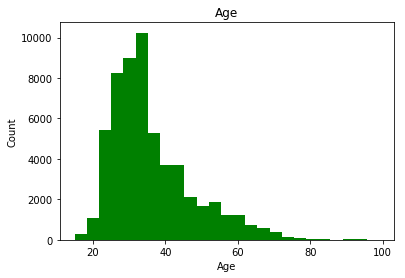

In [601]:
# Plot Data
plt.hist(train_noNA_part['age'], 25, facecolor='green')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age')
plt.show()

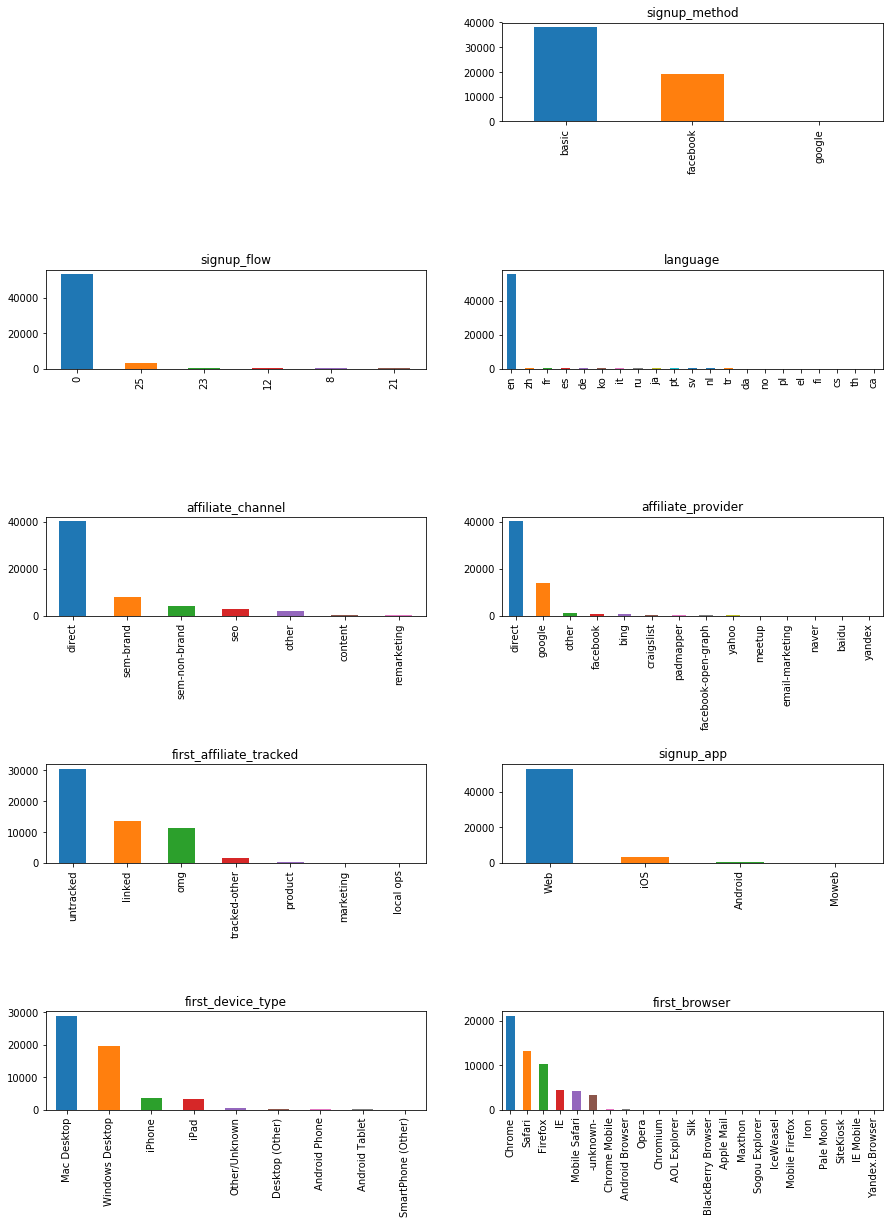

In [602]:
# Count Frequency
train_noNA_part.groupby('first_device_type').count()
#train_noNA_part['first_device_type'].value_counts().plot(kind='bar')

fig = plt.figure()
fig.set_size_inches(15, 20)
plt.subplots_adjust(hspace=1.5)
for k in range(6,15):
    ax = fig.add_subplot(5, 2, k-4)
    train_noNA_part[train_noNA_part.columns.values[k]].value_counts().plot(kind='bar', ax=ax)
    plt.title(train_noNA_part.columns.values[k])

In [603]:
train_noNA_part[train_noNA_part.columns.values[5:15]].head(5)

# Separate into Continuous and Categorical Predicators
train_noNA_cat = train_noNA_part[train_noNA_part.columns.values[[np.r_[6:7, 8:15]]]]
train_noNA_con = train_noNA_part[train_noNA_part.columns.values[[5,7]]]

Y = train_noNA_part['country_destination']
# Transform into Dummy Variables of 0 or 1 (stacked)
train_noNA_cat = pd.get_dummies(data = train_noNA_cat, drop_first = True)
Y = pd.get_dummies(data = Y, drop_first = True)
X = pd.concat([pd.DataFrame(train_noNA_cat), pd.DataFrame(train_noNA_con)], axis = 1)

C:\Users\yongy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


In [608]:
# Fit Linear Regression (create validation set within training set)
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = .20, random_state = 10)
model = LinearRegression(fit_intercept=True)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_valid) # has negative values, should use logistic regression for categorical response having 0 or 1
Y_pred = (Y_pred > 0.5) # wrong
print(accuracy_score(Y_valid, Y_pred))
precision, recall, F1, support  = precision_recall_fscore_support(Y_valid, Y_pred, average='weighted')
print('Precision:', precision, 'Recall:', recall, 'F1:', F1)

0.7047902618442946
Precision: 0.5004544746385609 Recall: 0.7091998590059923 F1: 0.5868159737554848


C:\Users\yongy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [605]:
# Fit Logistic Regression (can only fit when response variable is 1-D)
destination_name = 'US'
model = LogisticRegression(fit_intercept=True, solver='lbfgs', multi_class='multinomial')
model.fit(X_train, Y_train[destination_name])
Y_pred = model.predict(X_valid) # has negative values, should use logistic regression
Y_pred = (Y_pred > 0.5)
print(accuracy_score(Y_valid[destination_name], Y_pred))
precision, recall, F1, support  = precision_recall_fscore_support(Y_valid[destination_name], Y_pred, average='weighted')
print('Precision:', precision, 'Recall:', recall, 'F1:', F1) # no data points are classified as positive?
#roc_curve(Y_pred,Y_valid[destination_name])

0.705228128557667
Precision: 0.49734671330894936 Recall: 0.705228128557667 F1: 0.5833198561293028


C:\Users\yongy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [609]:
# Test Model on Test Dataset
test_noNA[test_noNA.columns.values[4:14]].head(5)

# Separate into Continuous and Categorical Predicators
test_noNA_cat = test_noNA[test_noNA.columns.values[[np.r_[5:6, 7:14]]]]
test_noNA_con = test_noNA[test_noNA.columns.values[[4,6]]]

# Transform into Dummy Variables of 0 or 1 (stacked)
test_noNA_cat = pd.get_dummies(data = test_noNA_cat, drop_first = True)
X_test = pd.concat([pd.DataFrame(test_noNA_cat), pd.DataFrame(test_noNA_con)], axis = 1)
Y_test = model.predict(X_test)
#Y_test = (Y_test > 0.5)
pd.DataFrame(Y_test)


C:\Users\yongy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """


,0,1,2,3,4,5,6,7,8,9
0,0.011958,0.003695,0.013153,0.035479,0.006065,0.022597,0.017636,0.000878,0.808740,0.078572
1,0.014582,0.008182,0.021445,0.037027,0.022429,0.033189,0.010261,0.003150,0.722165,0.115472
2,0.012376,0.009056,0.011041,0.050876,0.025690,0.029206,0.004976,0.000253,0.731569,0.123141
3,0.010587,0.007711,0.015644,0.042282,0.018427,0.026685,0.006087,0.000657,0.747000,0.122978
4,0.009849,0.013266,0.033929,0.057488,0.025383,0.027009,0.008376,0.003409,0.718843,0.097726
5,0.017676,0.009777,0.017941,0.049620,0.031490,0.025826,0.005237,0.001643,0.719662,0.119791
6,0.015091,0.007833,0.024590,0.037207,0.020999,0.022183,0.006841,0.002227,0.741951,0.119556
7,0.021650,0.002115,0.016790,0.070257,0.006213,0.031554,0.010511,0.001380,0.704440,0.128602
8,0.010190,0.011329,0.029656,0.043480,0.022507,0.022073,0.006918,0.002777,0.705125,0.139424
9,0.014282,0.014384,0.022598,0.072299,0.032827,0.039709,0.008264,0.001870,0.699449,0.082241


In [607]:
# Use StatsModels to Display Model Summary
import statsmodels.api as sm
mod = sm.GLS(Y_train[destination_name], X_train, family = sm.families.Gaussian())
reg = mod.fit()
print(reg.summary())

                            GLS Regression Results                            
Dep. Variable:                     US   R-squared:                    -175.876
Model:                            GLS   Adj. R-squared:               -176.190
Method:                 Least Squares   F-statistic:                    -559.7
Date:                Sun, 03 Mar 2019   Prob (F-statistic):               1.00
Time:                        20:06:41   Log-Likelihood:                -28645.
No. Observations:               45676   AIC:                         5.745e+04
Df Residuals:                   45595   BIC:                         5.816e+04
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

Notes for next time: fit CART SVM KNN NB. Where will a new guest book their first travel experience?

Date/Time may indicate seasons suitable for travel to certain destinations.
Signup method/device type may indicate personal traits.
Language may indicate travel preference.